In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [6]:
# Importing all datasets
loan_train = pd.read_csv("/content/train.csv")
loan_train.head(4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0


In [7]:
# Importing all datasets
loan_test = pd.read_csv("/content/test.csv")
loan_test.head(4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.08269,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.79560,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.28083,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.82351,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN


In [8]:
loan_test["Loan Status"] = 0

In [9]:
loan_test.head(4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.08269,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,0
1,22540813,7133,11650,12615.79560,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,0
2,9862181,25291,25825,11621.28083,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,0
3,10097822,30781,9664,15375.82351,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,0


### Feature Engineering 

In [10]:
loan_train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [11]:
loan_train.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


### Checking the `missing values`

In [12]:
loan_train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

 - Please Note , there is no missing values in the dataset

In [13]:
loan_train.head(3)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0


In [14]:
### Checking the categorical values in 'Object Format'

In [15]:
loan_train.Grade.value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [16]:
loan_train["Employment Duration"].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

In [17]:
loan_train["Application Type"].value_counts()

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

In [18]:
loan_train["Verification Status"].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

In [19]:
loan_train["Payment Plan"].value_counts()

n    67463
Name: Payment Plan, dtype: int64

#### Mean Encoding 

#### Grade

In [20]:
mean_labels=loan_train.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype='object', name='Grade')

In [21]:
enumerate(mean_labels,0)

In [22]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'A': 1, 'B': 0, 'C': 2, 'D': 4, 'E': 3, 'F': 5, 'G': 6}

In [23]:
loan_train['Grade_mean_labels']=loan_train['Grade'].map(mean_labels2)
loan_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_labels
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,2
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,5
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,2
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,2


In [24]:
loan_train = loan_train.drop(columns="Grade")

In [25]:
loan_train.shape

(67463, 35)

#### Employment Duration 

In [26]:
mean_labels=loan_train.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object', name='Employment Duration')

In [27]:
enumerate(mean_labels,0)

In [28]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'MORTGAGE': 0, 'OWN': 2, 'RENT': 1}

In [29]:
loan_train['Employment Duration_ordinal_labels']=loan_train['Employment Duration'].map(mean_labels2)

In [30]:
loan_train  = loan_train.drop(columns="Employment Duration")

#### Application Type

In [31]:
mean_labels=loan_train.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['JOINT', 'INDIVIDUAL'], dtype='object', name='Application Type')

In [32]:
enumerate(mean_labels,0)

In [33]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'INDIVIDUAL': 1, 'JOINT': 0}

In [34]:
loan_train['Application Type_mean_labels']=loan_train['Application Type'].map(mean_labels2)

In [35]:
loan_train = loan_train.drop(columns="Application Type")

#### Verification Status

In [36]:
mean_labels=loan_train.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['Verified', 'Not Verified', 'Source Verified'], dtype='object', name='Verification Status')

In [37]:
enumerate(mean_labels,0)

In [38]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'Not Verified': 1, 'Source Verified': 2, 'Verified': 0}

In [39]:
loan_train['Verification Status_mean_labels']=loan_train['Verification Status'].map(mean_labels2)

In [40]:
loan_train = loan_train.drop(columns="Verification Status")

###### Payment Plan

In [41]:
mean_labels=loan_train.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['n'], dtype='object', name='Payment Plan')

In [42]:
enumerate(mean_labels,0)

In [43]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'n': 0}

In [44]:
loan_train['Payment Plan_mean_labels']=loan_train['Payment Plan'].map(mean_labels2)

In [45]:
loan_train = loan_train.drop(columns="Payment Plan")

### Similarly for the test dataset

In [46]:
loan_test.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

#### Grade

In [47]:
mean_labels=loan_test.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='Grade')

In [48]:
enumerate(mean_labels,0)

In [49]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [50]:
loan_test['Grade_mean_labels']=loan_test['Grade'].map(mean_labels2)

In [51]:
loan_test = loan_test.drop(columns="Grade")

#### Employment Duration 

In [52]:
mean_labels=loan_test.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['MORTGAGE', 'OWN', 'RENT'], dtype='object', name='Employment Duration')

In [53]:
enumerate(mean_labels,0)

In [54]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'MORTGAGE': 0, 'OWN': 1, 'RENT': 2}

In [55]:
loan_test['Employment Duration_mean_labels']=loan_test['Employment Duration'].map(mean_labels2)

In [56]:
loan_test = loan_test.drop(columns="Employment Duration")

#### Application Type

In [57]:
mean_labels=loan_test.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['INDIVIDUAL', 'JOINT'], dtype='object', name='Application Type')

In [58]:
enumerate(mean_labels,0)

In [59]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'INDIVIDUAL': 0, 'JOINT': 1}

In [60]:
loan_test['Application Type_mean_labels']=loan_test['Application Type'].map(mean_labels2)

In [61]:
loan_test = loan_test.drop(columns="Application Type")

#### Verification Status

In [62]:
mean_labels=loan_test.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['Not Verified', 'Source Verified', 'Verified'], dtype='object', name='Verification Status')

In [63]:
enumerate(mean_labels,0)

In [64]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [65]:
loan_test['Verification Status_mean_labels']=loan_test['Verification Status'].map(mean_labels2)

In [66]:
loan_test = loan_test.drop(columns="Verification Status")

###### Payment Plan

In [67]:
mean_labels=loan_test.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['n'], dtype='object', name='Payment Plan')

In [68]:
enumerate(mean_labels,0)

In [69]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'n': 0}

In [70]:
loan_test['Payment Plan_mean_labels']=loan_test['Payment Plan'].map(mean_labels2)

In [71]:
loan_test = loan_test.drop(columns="Payment Plan")

#### Label Encoding For Train And Test Dataset

In [72]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in Rest Object Columns.
loan_train['Batch Enrolled']= label_encoder.fit_transform(loan_train['Batch Enrolled'])
 
loan_train['Batch Enrolled'].unique()

array([16,  4, 11, 15, 32, 29, 31, 17, 10, 13, 14, 39, 20, 19, 34, 37,  9,
       30, 25,  7, 27, 38,  2, 26, 21,  3, 18, 28,  0, 40,  8,  6, 33, 24,
       36, 35, 12, 23, 22,  5,  1])

In [73]:
loan_train['Sub Grade']= label_encoder.fit_transform(loan_train['Sub Grade'])

In [74]:
loan_train['Loan Title']= label_encoder.fit_transform(loan_train['Loan Title'])

In [75]:
loan_train['Initial List Status']= label_encoder.fit_transform(loan_train['Initial List Status'])

#### Similarly For Test Dataset

In [76]:
loan_test['Batch Enrolled']= label_encoder.fit_transform(loan_test['Batch Enrolled'])

In [77]:
loan_test['Sub Grade']= label_encoder.fit_transform(loan_test['Sub Grade'])

In [78]:
loan_test['Loan Title']= label_encoder.fit_transform(loan_test['Loan Title'])

In [79]:
loan_test['Initial List Status']= label_encoder.fit_transform(loan_test['Initial List Status'])

In [80]:
### Checking the dtypes for the dataset

In [81]:
loan_train.dtypes

ID                                      int64
Loan Amount                             int64
Funded Amount                           int64
Funded Amount Investor                float64
Term                                    int64
Batch Enrolled                          int64
Interest Rate                         float64
Sub Grade                               int64
Home Ownership                        float64
Loan Title                              int64
Debit to Income                       float64
Delinquency - two years                 int64
Inquires - six months                   int64
Open Account                            int64
Public Record                           int64
Revolving Balance                       int64
Revolving Utilities                   float64
Total Accounts                          int64
Initial List Status                     int64
Total Received Interest               float64
Total Received Late Fee               float64
Recoveries                        

In [82]:
X_train = loan_train.drop(columns="Loan Status")

In [83]:
y_train = loan_train["Loan Status"]

In [84]:
X_test = loan_test.drop(columns="Loan Status")

In [85]:
y_test = loan_test["Loan Status"]

##### Dimensions 

In [86]:
X_train.shape

(67463, 34)

In [87]:
X_test.shape

(28913, 34)

In [88]:
y_train.shape

(67463,)

In [89]:
y_test.shape

(28913,)

##### DISTRIBUTION OF THE `COLUMNS` 

In [90]:
import matplotlib.pyplot as plt

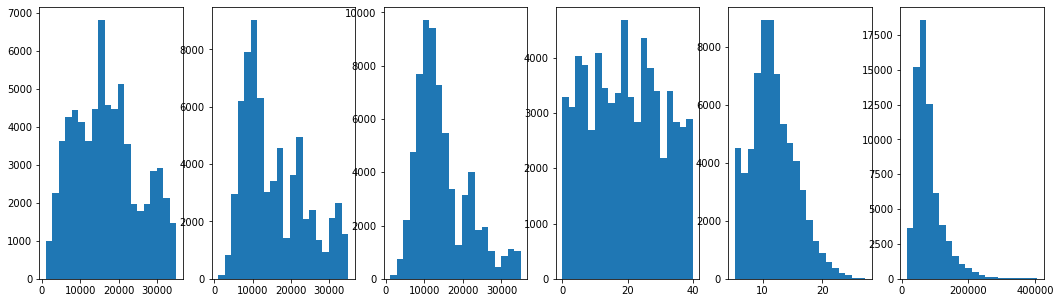

In [91]:
plt.figure(figsize=(18,5))
plt.subplot(1,6,1)
plt.hist(X_train['Loan Amount'],bins=20)
plt.subplot(1,6,2)
plt.hist(X_train['Funded Amount'],bins=20)
plt.subplot(1,6,3)
plt.hist(X_train['Funded Amount Investor'],bins=20)
plt.subplot(1,6,4)
plt.hist(X_train['Batch Enrolled'],bins=20)
plt.subplot(1,6,5)
plt.hist(X_train['Interest Rate'],bins=20)
plt.subplot(1,6,6)
plt.hist(X_train['Home Ownership'],bins=20)
plt.show()

### Checking For `Outliers`

##### Outlier Treatment

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

##### Isolation Forest

`Isolation Forest`, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

for reference,
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/


In [92]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

In [93]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [94]:
# select all rows that are not outliers
mask = yhat != -1

In [95]:
X_train = X_train[mask]

In [96]:
y_train = y_train[mask]

In [97]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(60716, 34) (60716,)


In [98]:
## FEATURE SELECTION 

In [99]:
#### Univariate Selection

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [102]:
print(model.feature_importances_)

[0.03962124 0.04019231 0.03914374 0.03958493 0.01890662 0.03916908
 0.03988835 0.03900881 0.04035048 0.033403   0.03915395 0.02150773
 0.01096549 0.03881382 0.00949317 0.03864288 0.03990183 0.03964292
 0.00569124 0.03957263 0.03960261 0.0393033  0.03886038 0.00262356
 0.03953853 0.         0.04005626 0.04016308 0.0395977  0.03044489
 0.01415941 0.00047608 0.02251997 0.        ]


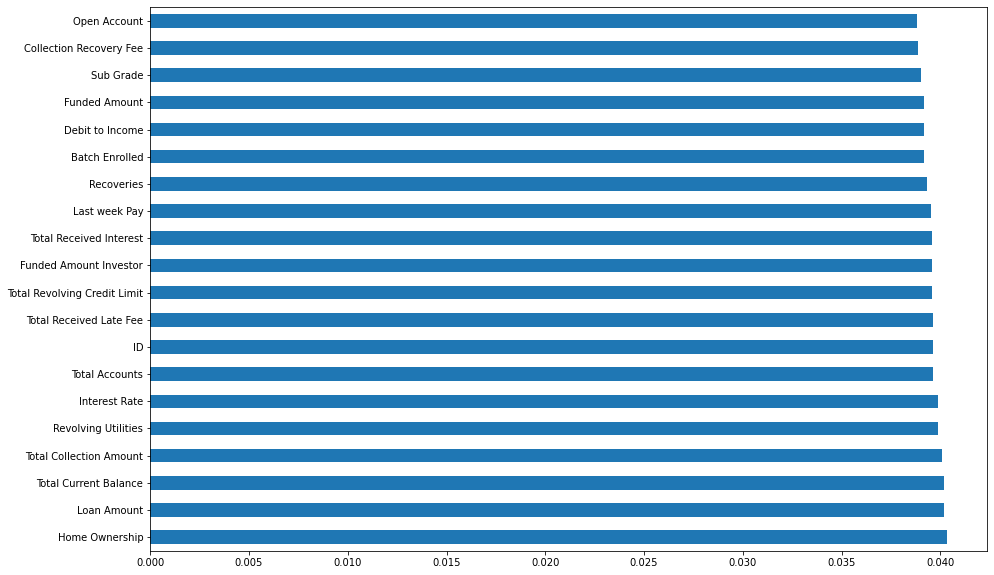

In [103]:
plt.figure(figsize = [15,10])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [104]:
ranked_features.nlargest(20, keep='all')

Home Ownership                  0.040350
Loan Amount                     0.040192
Total Current Balance           0.040163
Total Collection Amount         0.040056
Revolving Utilities             0.039902
Interest Rate                   0.039888
Total Accounts                  0.039643
ID                              0.039621
Total Received Late Fee         0.039603
Total Revolving Credit Limit    0.039598
Funded Amount Investor          0.039585
Total Received Interest         0.039573
Last week Pay                   0.039539
Recoveries                      0.039303
Batch Enrolled                  0.039169
Debit to Income                 0.039154
Funded Amount                   0.039144
Sub Grade                       0.039009
Collection Recovery Fee         0.038860
Open Account                    0.038814
dtype: float64

In [105]:
X_train.corr()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_labels,Employment Duration_ordinal_labels,Application Type_mean_labels,Verification Status_mean_labels,Payment Plan_mean_labels
ID,1.000000,-0.002835,-0.010750,-0.001957,0.013729,0.004107,0.004314,0.009271,-0.009911,-0.000868,-0.011588,-0.005697,-0.019705,-0.006913,0.000664,-0.003522,0.001973,-0.000994,0.004647,-0.008204,-0.000761,-0.002715,-0.018535,-0.013218,0.002250,NaN,-0.002622,-0.009946,-0.007558,-0.002729,-0.000252,0.002682,0.008595,NaN
Loan Amount,-0.002835,1.000000,-0.003100,0.001819,0.005395,-0.001760,-0.005593,-0.004197,0.014238,-0.003765,0.012350,-0.004687,0.003077,0.007040,-0.004878,-0.009323,0.014461,-0.000112,0.003385,-0.003684,-0.005905,-0.002461,-0.007205,-0.003963,0.000168,NaN,-0.005766,-0.011148,0.004066,-0.034147,-0.027666,-0.004122,-0.015122,NaN
Funded Amount,-0.010750,-0.003100,1.000000,0.007637,0.008291,0.000973,-0.001410,0.001420,-0.008578,0.000968,0.001434,-0.003141,-0.007390,0.000618,-0.000423,-0.006706,0.002378,0.010940,-0.004186,-0.000619,-0.007717,-0.006508,-0.003131,-0.005044,-0.002720,NaN,-0.007063,-0.010377,0.004956,-0.003868,0.014052,-0.005235,0.000838,NaN
Funded Amount Investor,-0.001957,0.001819,0.007637,1.000000,0.003928,0.004942,-0.003032,-0.001751,-0.002299,-0.000690,-0.001206,-0.005150,-0.007498,-0.010866,-0.003097,-0.011931,-0.002871,0.002015,0.009482,-0.006111,-0.008647,-0.002650,-0.010104,-0.005871,0.001833,NaN,-0.006530,-0.006206,-0.001948,0.007031,-0.012902,-0.002351,-0.000263,NaN
Term,0.013729,0.005395,0.008291,0.003928,1.000000,0.005013,0.002827,-0.001337,-0.002262,-0.002660,0.005179,0.010606,0.023735,0.023333,0.019122,0.017228,0.000150,0.010668,-0.001667,0.011812,0.013756,0.011716,0.011047,0.013147,0.003957,NaN,0.013722,0.010428,0.009881,0.008848,0.006169,-0.001477,-0.010161,NaN
Batch Enrolled,0.004107,-0.001760,0.000973,0.004942,0.005013,1.000000,-0.001175,0.002093,-0.000938,-0.004751,0.004487,-0.007801,0.000210,0.007007,-0.003932,0.003767,0.001707,0.003423,0.010823,0.001012,0.003694,-0.002779,0.000232,-0.004667,-0.004460,NaN,0.001149,-0.011092,0.002967,0.007026,-0.010022,0.001755,0.003485,NaN
Interest Rate,0.004314,-0.005593,-0.001410,-0.003032,0.002827,-0.001175,1.000000,-0.001933,0.001039,0.000496,-0.010514,0.000131,0.000934,-0.003991,0.000020,0.016411,0.003031,0.006022,0.005448,0.000986,0.004124,0.005634,-0.001626,-0.010491,-0.010238,NaN,-0.002908,-0.004201,0.015151,0.009781,0.014935,0.001605,0.003142,NaN
Sub Grade,0.009271,-0.004197,0.001420,-0.001751,-0.001337,0.002093,-0.001933,1.000000,0.007814,0.000638,-0.008373,0.004904,-0.010856,-0.004597,0.005511,-0.000419,-0.008454,0.000673,-0.004521,-0.000457,0.001211,-0.008203,-0.000051,0.009562,0.008314,NaN,-0.005551,0.004589,0.004381,0.022889,0.002774,-0.002000,0.006913,NaN
Home Ownership,-0.009911,0.014238,-0.008578,-0.002299,-0.002262,-0.000938,0.001039,0.007814,1.000000,0.003572,0.022812,-0.016363,-0.010247,0.005847,-0.004190,0.011986,-0.006696,0.016526,0.024729,-0.013731,-0.004953,-0.004691,-0.005881,-0.014743,-0.006912,NaN,-0.003166,0.001835,-0.000736,0.011700,-0.024332,0.002746,-0.006870,NaN
Loan Title,-0.000868,-0.003765,0.000968,-0.000690,-0.002660,-0.004751,0.000496,0.000638,0.003572,1.000000,0.002945,-0.005348,-0.008662,0.001531,0.004707,-0.006913,-0.004014,-0.003708,-0.004750,-0.002885,0.001576,-0.000209,-0.000374,0.000880,0.006016,NaN,0.002410,-0.001492,0.000434,0.006858,-0.001514,-0.006434,0.004970,NaN


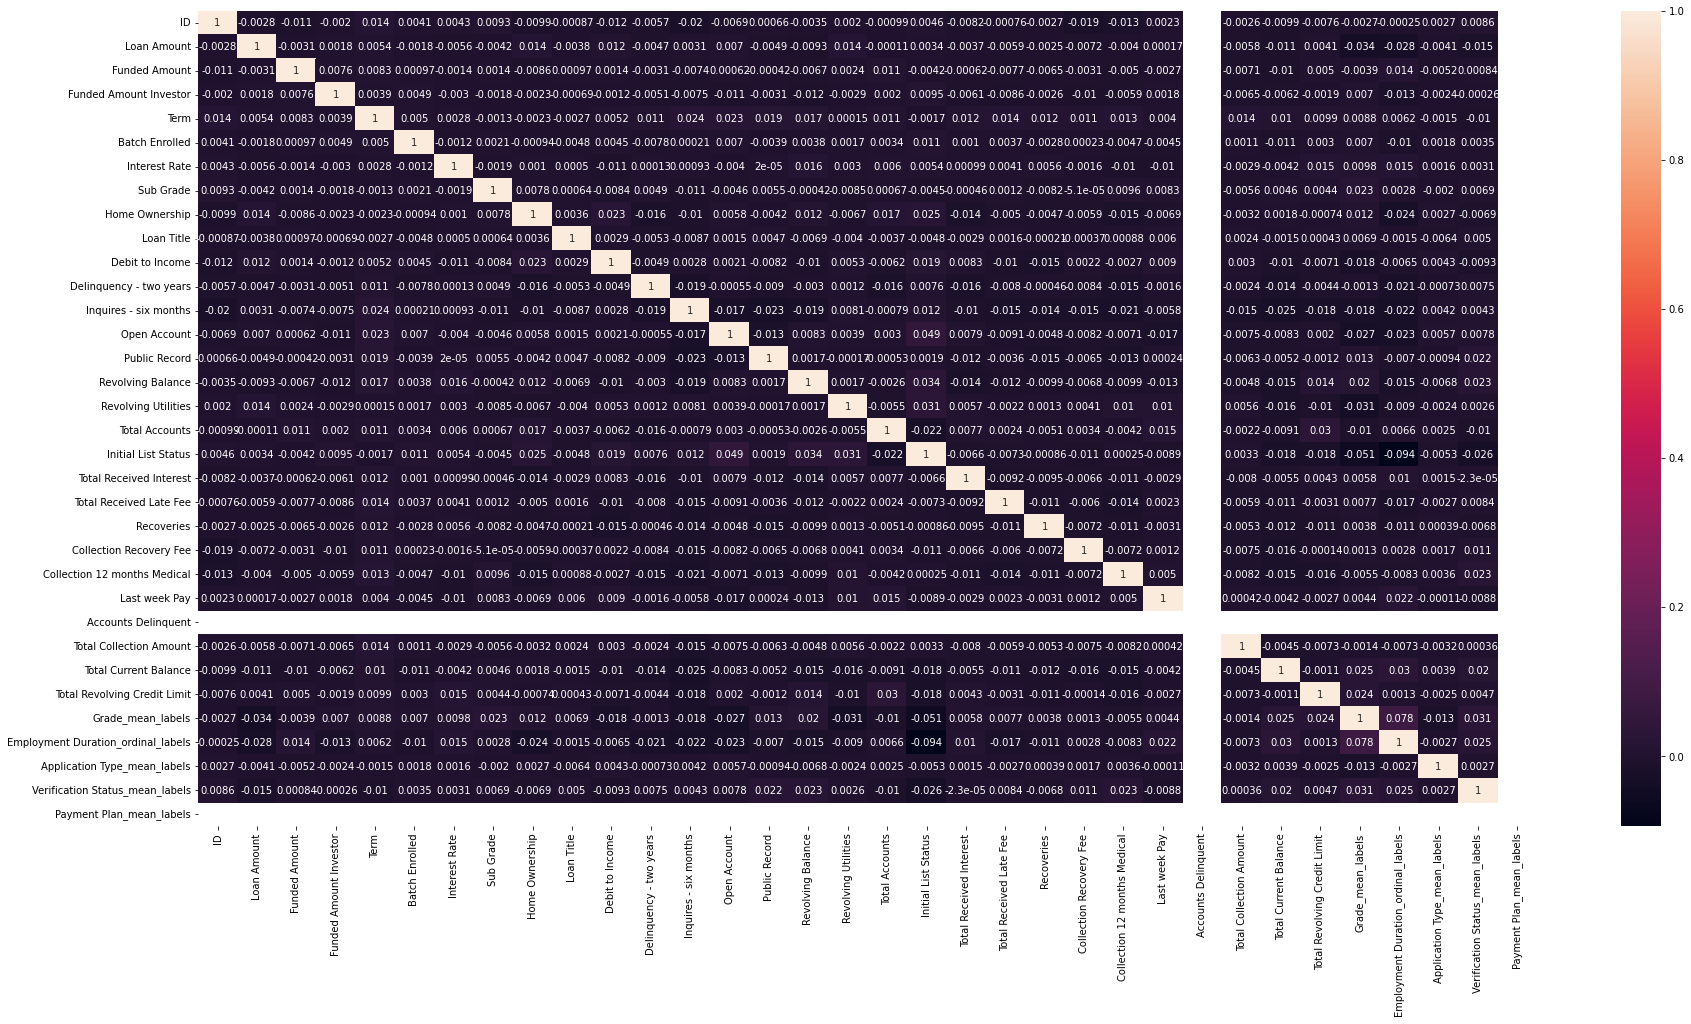

In [106]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(30,15))
sns.heatmap(X_train[top_features].corr(),annot=True)


### Reduction Of `Multi Collinearity`

In [107]:
threshold=0.6

In [108]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [109]:
correlation(X_train,threshold)

set()

In [110]:
from sklearn.feature_selection import mutual_info_classif

In [111]:
mutual_info=mutual_info_classif(X_train,y_train)

In [112]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

Application Type_mean_labels          0.014506
Verification Status_mean_labels       0.004877
Initial List Status                   0.004582
Term                                  0.004288
Loan Title                            0.003649
Grade_mean_labels                     0.002803
Collection Recovery Fee               0.002253
Employment Duration_ordinal_labels    0.001818
Delinquency - two years               0.001569
Loan Amount                           0.001532
Public Record                         0.001417
Last week Pay                         0.001089
Revolving Balance                     0.001044
Revolving Utilities                   0.000879
Batch Enrolled                        0.000850
Funded Amount Investor                0.000674
Total Current Balance                 0.000587
Recoveries                            0.000507
Total Accounts                        0.000434
Funded Amount                         0.000335
Collection 12 months Medical          0.000298
Interest Rate

In [113]:



#'Inquires - six months','Delinquency - two years','Total Received Late Fee','Sub Grade','Interest Rate','Collection 12 months Medical','Accounts Delinquent','Total Collection Amount','Total Revolving Credit Limit','Grade_mean_labels','ID'                                    



In [114]:
X_train = X_train.drop(columns = ['Inquires - six months','Delinquency - two years','Total Received Late Fee','Sub Grade','Interest Rate','Collection 12 months Medical','Accounts Delinquent','Total Collection Amount','Total Revolving Credit Limit','Grade_mean_labels','ID'])

In [115]:
X_test = X_test.drop(columns = ['Inquires - six months','Delinquency - two years','Total Received Late Fee','Sub Grade','Interest Rate','Collection 12 months Medical','Accounts Delinquent','Total Collection Amount','Total Revolving Credit Limit','Grade_mean_labels','ID'])

In [116]:
X_train.shape

(60716, 23)

In [117]:
X_test.shape

(28913, 23)

#### Checking With ANN Model as Well 

In [118]:
import pandas as pd
import numpy as np 
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

In [121]:
# Standard Imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import log_loss

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, Dropout, Activation

from hyperopt import tpe, STATUS_OK, Trials
from hyperas import optim
from hyperas.distributions import choice, uniform

In [122]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [120]:
 #!pip install hyperas


In [ ]:
 #!pip install hyperopt

In [124]:
from keras import models

In [125]:
from keras.layers.core import Dense, Dropout, Activation

In [126]:
from hyperas import optim
from hyperas.distributions import choice, uniform

In [127]:
X_train.shape

(60716, 23)

In [128]:
y_train.shape

(60716,)

In [129]:
X_test.shape

(28913, 23)

In [130]:
y_test.shape

(28913,)

In [131]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score
import sys

In [132]:
def data():  
  global test
  # Importing data
  train = pd.read_csv("/content/train.csv")
  test = pd.read_csv("/content/test.csv")

  # Dropping unnecessary columns in both test and training sets
  train = train.drop("ID", axis=1)
  test = test.drop(["Loan Status", "ID"], axis=1)
  train = train.drop(columns = ['Inquires - six months','Delinquency - two years','Total Received Late Fee','Sub Grade','Interest Rate','Collection 12 months Medical','Accounts Delinquent','Total Collection Amount','Total Revolving Credit Limit'])
  test = test.drop(columns = ['Inquires - six months','Delinquency - two years','Total Received Late Fee','Sub Grade','Interest Rate','Collection 12 months Medical','Accounts Delinquent','Total Collection Amount','Total Revolving Credit Limit'])
  # Let's split the data into features and target variables
  X = train.drop("Loan Status", axis=1)
  y = train["Loan Status"]

  # Splitting the data into training and validation sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  
  # Converting non- numerical columns into numerica Columns
  for label, content in X_train.items():
    if not pd.api.types.is_numeric_dtype(content):
      encoder = LabelEncoder()
      X_train[label] = encoder.fit_transform(X_train[label])
      X_test[label] = encoder.transform(X_test[label])
      test[label] = encoder.transform(test[label])

  # Now we scale the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  test = scaler.transform(test)

  return X_train, y_train, X_test, y_test

# Calling our function
X_train, y_train, X_test, y_test = data()

In [133]:
X_train[0].shape

(24,)

In [134]:
def model(X_train, y_train, X_test, y_test):
  # Set random seed
  from keras.layers.advanced_activations import LeakyReLU

  tf.random.set_seed(42)

  # Create a model
  model = Sequential()
  model.add(Input(shape=X_train[0].shape))
  model.add(Dense({{choice([20, 30, 40])}}))
  model.add(LeakyReLU(alpha={{uniform(0.5, 1)}}))
  model.add(Dropout({{uniform(0.5, 1)}}))
  model.add(Dense({{choice([10, 20, 30])}}))
  model.add(LeakyReLU(alpha={{uniform(0.5, 1)}}))
  model.add(Dropout({{uniform(0.5, 1)}}))

  # Let's add another layer according to choice
  if {{choice(["a", "b"])}} == "b":
    model.add(Dense(5, activation="relu"))
    model.add(Dropout({{uniform(0.5, 1)}}))

  # Let's add the final layer
  model.add(Dense(1))
  model.add(Activation({{choice(["sigmoid", "softmax"])}}))

  # let's compile the model
  model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate={{choice([0.1, 0.001, 0.01, 3e-4])}}),
                metrics=["accuracy"])
  
  # Fit the model
  model.fit(X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=100,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)], verbose=0)
  
  # Evaluate our model
  loss, acc = model.evaluate(X_test, y_test, verbose=0)
  print("Validation accuracy :", acc)

  return {"loss" : -acc, "model" : model, 'status' : STATUS_OK}

In [135]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [136]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [137]:
fid = drive.ListFile({'q':"title='predicttheloanstatusann2.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('predicttheloanstatusann2.ipynb')

In [139]:
best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          max_evals=5,
                                          algo=tpe.suggest,
                                          notebook_name='predicttheloanstatusann2', # This is important!
                                          trials=Trials())

>>> Imports:
#coding=utf-8

try:
    from google.colab import drive
except:
    pass

try:
    from sklearn.datasets import load_iris
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.preprocessing import StandardScaler
except:
    pass

try:
    from sklearn.decomposition import PCA
except:
    pass

try:
    from sklearn.pipeline import Pipeline
except:
    pass

try:
    from sklearn.linear_model import LogisticRegression
except:
    pass

try:
    from sklearn.tree import DecisionTreeClassifier
except:
    pass

try:
    from sklearn.ensemble import RandomForestClassifier
except:
    pass

try:
    import warnings
except:
    pass

try:
    import pandas, numpy as pdnp
except:
    pass

try:
    from sklearn import preprocessing
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from pandas import read_csv
except:
    pass

try:
    from sklearn.model_selection import train_test

In [140]:
log_loss(y_test, best_model.predict(X_test))

0.303267234873822

In [141]:
best_run

{'Activation': 0,
 'Dense': 1,
 'Dense_1': 1,
 'alpha': 0.5089093075686137,
 'alpha_1': 0.9225149382369955,
 'alpha_2': 0.8054381546406179,
 'alpha_3': 0.8685849187307607,
 'alpha_4': 0,
 'alpha_5': 0.6064002165637792,
 'learning_rate': 2}

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [147]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [162]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    target = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=24, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score


In [163]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', 'LeakyReLU','relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'elu',
 'batch_size': 335,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 44,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.42602224734191213,
 'neurons': 31,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.optimizer_v2.ftrl.Ftrl at 0x7fa2a668d750>}

In [164]:
# Final model

# Create a model
final = Sequential([
  Input(shape=X_train[0].shape),
  Dense(335, activation="elu"),
  Dropout(0.4360590193711702),
  Dense(335, activation="elu"),
  Dropout(0.23077874175693686),
  Dense(1, activation="sigmoid")
])

# Compile the model
final.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'),
              metrics=["accuracy"])

#Fit the model
history =   final.fit(X_train, y_train, epochs=150,
            validation_data=(X_test, y_test),
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=150)])

Epoch 1/150
1687/1687 [==============================] - 9s 5ms/step - loss: 0.3373 - accuracy: 0.9014 - val_loss: 0.3100 - val_accuracy: 0.9097
Epoch 2/150
1687/1687 [==============================] - 8s 5ms/step - loss: 0.3197 - accuracy: 0.9069 - val_loss: 0.3065 - val_accuracy: 0.9097
Epoch 3/150
1687/1687 [==============================] - 8s 5ms/step - loss: 0.3167 - accuracy: 0.9069 - val_loss: 0.3063 - val_accuracy: 0.9097
Epoch 4/150
1687/1687 [==============================] - 9s 5ms/step - loss: 0.3146 - accuracy: 0.9069 - val_loss: 0.3056 - val_accuracy: 0.9097
Epoch 5/150
1687/1687 [==============================] - 8s 5ms/step - loss: 0.3139 - accuracy: 0.9069 - val_loss: 0.3048 - val_accuracy: 0.9097
Epoch 6/150
1687/1687 [==============================] - 9s 5ms/step - loss: 0.3134 - accuracy: 0.9069 - val_loss: 0.3054 - val_accuracy: 0.9097
Epoch 7/150
1687/1687 [==============================] - 9s 5ms/step - loss: 0.3128 - accuracy: 0.9069 - val_loss: 0.3053 - val_ac

In [165]:
X_test.shape

(13493, 24)

In [167]:
log_loss(y_test, final.predict(X_test))

0.3082824582288898

In [168]:
predictions=final.predict(test).flatten()
submissions = pd.DataFrame()
predictions

array([0.04601859, 0.08100264, 0.10488605, ..., 0.18632722, 0.16520104,
       0.19594584], dtype=float32)

In [169]:
submissions["Loan Status"] = predictions
submissions.to_csv("my_submission_file.csv", index=False)